In [5]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import cm
plt.rcParams['figure.figsize'] = (7.0, 7.0)

In [6]:
#importing the training and testing data files
from google.colab import files
uploaded = files.upload()

Saving FoDS-A1.csv to FoDS-A1 (2).csv


In [7]:
data = pd.read_csv(io.BytesIO(uploaded['FoDS-A1.csv']))
data.head()

,Strength,Temperature,Pressure
0,30.7,240,16
1,24.7,250,18
2,30.6,260,16
3,32.8,240,10
4,20.7,240,20


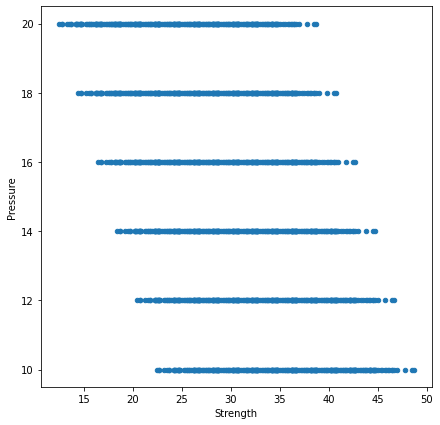

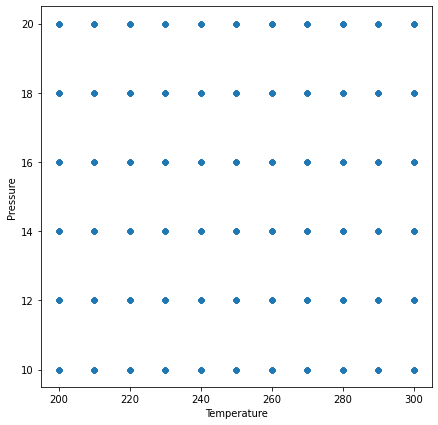

In [8]:
data.plot(x='Strength', y='Pressure', kind='scatter')
data.plot(x='Temperature', y='Pressure', kind='scatter')

In [9]:
data=data.sample(frac=1, random_state=50)
data.head()

,Strength,Temperature,Pressure
994,21.5,200,12
886,26.4,250,16
1565,24.7,240,16
1607,18.2,200,16
344,16.6,200,18


In [10]:
def x_transform(datax, degree):
    data = datax.copy()
    degree = int(degree)
    
    if degree==1:
        if len(data.columns) == 3:
            data.columns = ['x1', 'x2', 'y']
        return data
    if len(data.columns) == 3:
        data.columns = ['x1', 'x2', 'y']
    
    for d in range(2,degree+1):
        for x in range(d+1):
            data[ 'x1^'+str(x)+'x2^'+str(d-x) ] = (data.loc[:, 'x1']**x)*(data.loc[:, 'x2']**(d-x))
    
    return data



In [11]:
from itertools import combinations_with_replacement
def get_powers(degree):
    l=[0,1]
    powers=[]
    for i in range(1,degree+1):
        powers.append([x for x in combinations_with_replacement(l,i)])
    powers_flattened=[]
    for sublist in powers:
        for x in sublist:
            powers_flattened.append(x)
    return powers_flattened


def transform_data(X,degree):
    powers=get_powers(degree)
    X_new=np.ones((X.shape[0],len(powers)))
    for n in range(X.shape[0]):
        #print(n)
        for i in range(len(powers)):
            for j in powers[i]:
                X_new[n][i]=X_new[n][i]*X[n][j]
    return X_new


In [12]:
def cost_function(X,y,w,L):
  hypothesis=np.dot(X,w.T)#calculating hypothesis of all instances
  J=(1/(2*len(y)))*np.sum((hypothesis-y)**2)
  return J


In [13]:
def batch_gradient_descent(X,y,w,alpha,iters,Lambda_):
  cost_hist=np.zeros(iters)#storing cost function value of each iteration
  w_hist=np.zeros((iters,X_train.shape[1]))#for storing weight values at each iteration
  for t in range(iters): 
    hw=np.dot(X,w.T)#constructing hypothesis
    w=w-(alpha/len(y))*(np.dot(hw-y,X))#updating the weight value 
    w_hist[t]=w #storing weight values
    cost_hist[t]=cost_function(X,y,w,Lambda_)#storing the cost function value for that iteration
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]  
  return w,cost_hist,w_hist,w_best,cost_hist[minpos]


In [14]:
def stochastic_gradient_descent(X,y,w,alpha,iters,Lambda_):
  cost_hist=np.zeros(iters)#initialising cost function for each iteration 
  w_hist=np.zeros((iters,X_train.shape[1]))#for storing weight values at each iteration
  for t in range(iters):
    index=np.random.randint(len(y))#randomly selecting an index from the dataset
    Ind_X=X[index:index+1]#selecting features of that index
    Ind_Y=y[index:index+1]#selecting the true output of that index
    w=w-alpha*(Ind_X.T.dot(Ind_X.dot(w)-Ind_Y))#updation of weight value 
    w_hist[t]=w
    cost_hist[t]=cost_function(X,y,w,Lambda_)
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]  
  return w,cost_hist,w_hist,w_best,cost_hist[minpos]

In [15]:
#For mean square error
def mean_square_error(y_pred,y_actual):
  mse=math.sqrt((1/len(y_actual))*(np.sum(y_pred-y_actual)**2))
  return mse
  

In [16]:
#For mean absolute error
def mean_absolute_error(y_pred,y_actual):
  mae=(1/len(y_actual))*np.sum(np.absolute(y_pred-y_actual)) 
  return mae

In [17]:
# testing models against test data 
def predict(X_test,y_test,weights):
  hypothesis=np.dot(X_test,weights) 
  y_pred=hypothesis
  #printing predicted and actual output
  # for i in range(X_test.shape[0]):
  #       print("Predicted: {0}  Actual:{1}".format(y_pred[i],(y_test[i])))
  return y_pred

In [32]:
'''print(X_train)
print(X_train.shape)
print(X_train[:,1])
print(X_train[:,1].shape)
print(X_train[:,2])
print(X_train[:,2].shape)'''
def plot_results(X_train,y_pred_train):
    x = X_train[:, 1]
    y = X_train[:, 2]
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    my_cmap = plt.get_cmap('coolwarm') 
    surfplot=ax.plot_trisurf(x, y, y_pred_train, cmap = my_cmap)
    fig.colorbar(surfplot, shrink = 0.5, aspect = 10) 
    ax.set_title('Scatter plot(y_train) & Surface plot(y_predicted)')
    ax.set_xlabel('Strength')
    ax.set_ylabel('Temperature')
    ax.set_zlabel('Pressure')
    plt.show()
    plt.clf()

0
Training Error: 
Testing Error: 
Mean absolute error is  0.0789079537268611
1
Training Error: 
Testing Error: 
Mean absolute error is  0.47839953386048123


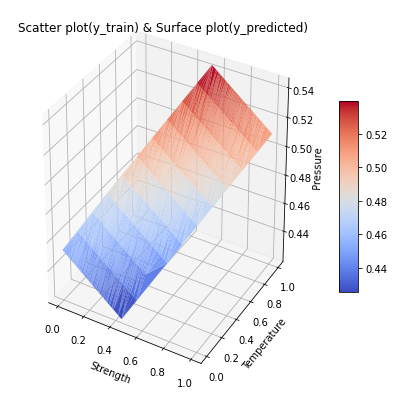

2
Training Error: 
Testing Error: 
Mean absolute error is  0.7637672250995547


<Figure size 504x504 with 0 Axes>

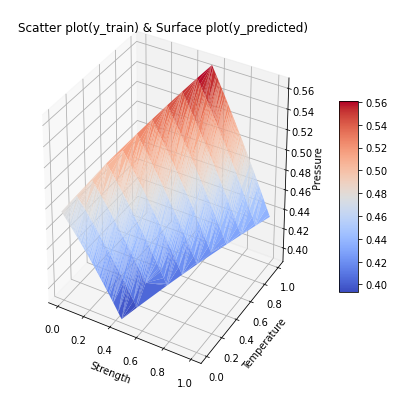

3
Training Error: 
Testing Error: 
Mean absolute error is  0.9279599311412539


<Figure size 504x504 with 0 Axes>

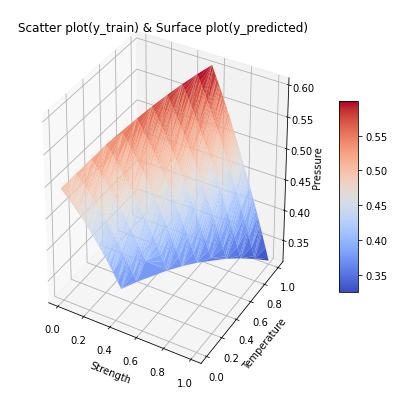

4
Training Error: 
Testing Error: 
Mean absolute error is  1.0298325287858232


<Figure size 504x504 with 0 Axes>

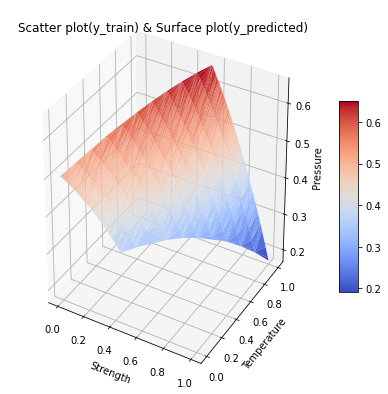

5
Training Error: 
Testing Error: 
Mean absolute error is  1.1002020832461177


<Figure size 504x504 with 0 Axes>

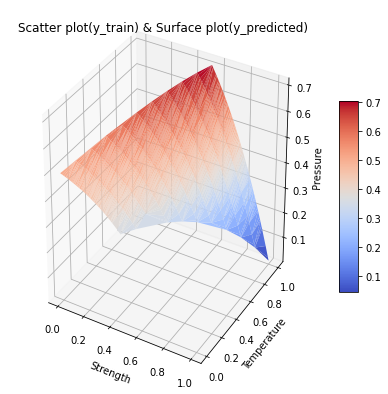

6
Training Error: 
Testing Error: 
Mean absolute error is  1.1560328084369746


<Figure size 504x504 with 0 Axes>

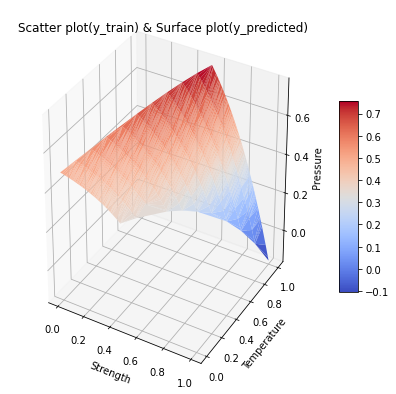

7
Training Error: 
Testing Error: 
Mean absolute error is  1.2063772094656098


<Figure size 504x504 with 0 Axes>

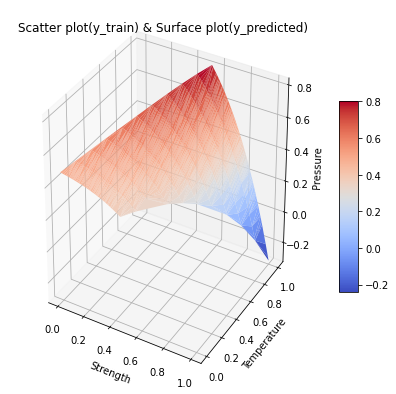

8
Training Error: 
Testing Error: 
Mean absolute error is  1.255026833597759


<Figure size 504x504 with 0 Axes>

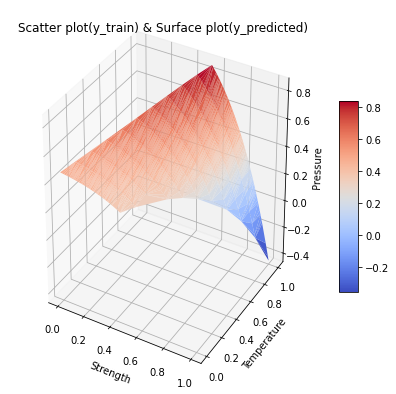

9
Training Error: 
Testing Error: 
Mean absolute error is  1.3025372219781426


<Figure size 504x504 with 0 Axes>

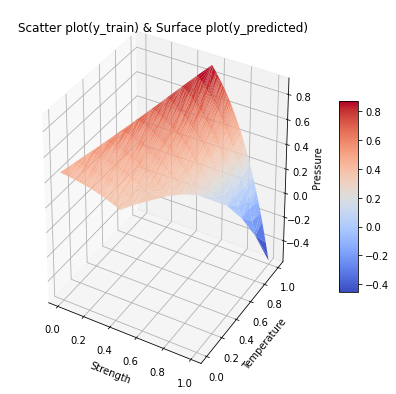

errors_train_rmse
[0.01264408 0.52379486 0.80808275 0.86433826 0.80789472 0.70979211
 0.61294067 0.53978632 0.49785901 0.48535677]


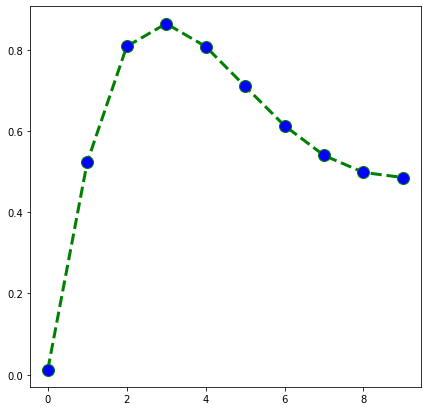

errors_test_rmse
[0.07890795 0.47839953 0.76376723 0.92795993 1.02983253 1.10020208
 1.15603281 1.20637721 1.25502683 1.30253722]


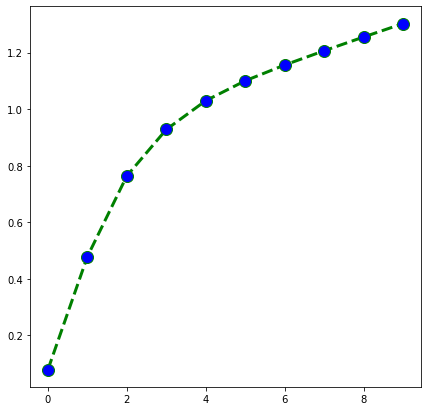

errors_train_abs
[0.29862733 0.29210554 0.278251   0.26193165 0.24632764 0.2331494
 0.22431244 0.21973801 0.21802266 0.21771123]


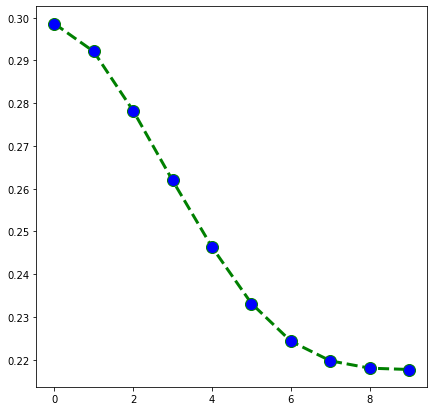

errors_test_abs
[0.30320289 0.29743469 0.28303552 0.2658348  0.2500464  0.23779289
 0.22929784 0.22487869 0.22414866 0.22441318]


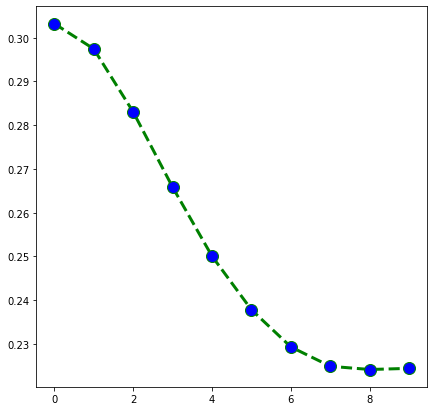

In [33]:
errors_train_rmse = np.zeros(10)
errors_test_rmse = np.zeros(10)
errors_train_abs = np.zeros(10)
errors_test_abs = np.zeros(10)
for i in range(0,10):
    #l=0
    datax = data
    train,test = np.split(datax,[int(.7*len(datax))])
    # print(train.shape)
    # print(test.shape)
    train=np.array(train)  
    test=np.array(test)
    X_train=np.delete(train,2,axis=1)
    X_train=transform_data(X_train,i)
    m=X_train.shape[0]
    xmin=np.min(X_train,axis=0)
    xmax=np.max(X_train,axis=0)
    X_train=(X_train-xmin)/(xmax-xmin) #performing normalization on input features 
    pp=np.ones([m,1])
    X_train=np.append(pp,X_train,axis=1)
    y_train = train[:,2]#true outputs of the instances
    ymin_train=np.min(y_train,axis=0)#taking minimum value
    ymax_train=np.max(y_train,axis=0)#taking maximum value
    y_train=(y_train-ymin_train)/(ymax_train-ymin_train)#normalising output
    w=np.zeros(X_train.shape[1])
    # print(" w shape =")
    # print(w.shape)
    alpha=0.0004
    Lambda=0.01
    iters=18000
    w_batch,cost_hist_batch,w_hist_batch,w_best_batch,cost_min_batch=batch_gradient_descent(X_train,y_train,w,alpha,iters, Lambda)
    # print(cost_hist_batch)
    # plt.plot(range(iters),cost_hist_batch)
    # plt.show() 
    # w_stoch,cost_hist_stoch,w_hist_stoch,w_best_stoch,cost_min_stoch=stochastic_gradient_descent(X_train,y_train,w,alpha,iters, Lambda)
    # # print(cost_hist_batch)
    # plt.plot(range(iters),cost_hist_batch)
    # plt.show()

    X_test=np.delete(test,2,axis=1)
    X_test=transform_data(X_test,i)
    # print("X_test shape=")
    # print(X_test.shape)
    m=X_test.shape[0]
    
    xmin=np.min(X_test,axis=0)
    xmax=np.max(X_test,axis=0)
    X_test=(X_test-xmin)/(xmax-xmin) #performing normalization on input features 
    pp=np.ones([m,1])
    X_test=np.append(pp,X_test,axis=1)

    X_test.shape
    y_test = test[:,2]#true outputs of the instances
    ymin_test=np.min(y_test,axis=0)#taking minimum value
    ymax_test=np.max(y_test,axis=0)#taking maximum value
    y_test=(y_test-ymin_test)/(ymax_test-ymin_test)#normalising output
    print(i)
    print("Training Error: ")
    y_pred_train=predict(X_train,y_train,w_best_batch) 
    # print('Mean absolute error is ',mean_square_error(y_pred_train,y_train)) 
    errors_train_rmse[i]=mean_square_error(y_pred_train,y_train)
    errors_train_abs[i]=mean_absolute_error(y_pred_train,y_train)
    #print('Mean square error is',mean_square_error(y_pred,y_test))
    #print('Correlation coefficient is', correlation_coefficient(y_pred,y_test))
    #y_predict_stoch=predict(X_test,y_train,w_best_stoch) 
    #print('Mean absolute error is ',mean_absolute_error(y_predict_stoch,y_test)) 
    #print('Mean square error is',mean_square_error(y_predict_stoch,y_test))
    #print('Correlation coefficient is', correlation_coefficient(y_predict_stoch,y_test))

    print("Testing Error: ")
    y_pred_test=predict(X_test,y_test,w_best_batch) 
    print('Mean absolute error is ',mean_square_error(y_pred_test,y_test)) 
    errors_test_rmse[i]=mean_square_error(y_pred_test,y_test)
    errors_test_abs[i]=mean_absolute_error(y_pred_test,y_test)
    #print('Mean square error is',mean_square_error(y_pred,y_test))
    #print('Correlation coefficient is', correlation_coefficient(y_pred,y_test))
    #y_predict_stoch=predict(X_test,y_test,w_best_stoch) 
    #print('Mean absolute error is ',mean_absolute_error(y_predict_stoch,y_test)) 
    #print('Mean square error is',mean_square_error(y_predict_stoch,y_test))
    #print('Correlation coefficient is', correlation_coefficient(y_predict_stoch,y_test))

    if i!=0:
      plot_results(X_train, y_pred_train)

print("errors_train_rmse")
print(errors_train_rmse)
plt.plot(errors_train_rmse,color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.show()
print("errors_test_rmse")
print(errors_test_rmse)
plt.plot(errors_test_rmse,color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.show()
print("errors_train_abs")
print(errors_train_abs)
plt.plot(errors_train_abs,color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.show()
print("errors_test_abs")
print(errors_test_abs)
plt.plot(errors_test_abs,color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.show()




### B Part


In [ ]:
def cost_function_ridge(X,y,w,L):
  hypothesis=np.dot(X,w.T)#calculating hypothesis of all instances
  #J=(1/(2*len(y)))*np.sum((hypothesis-y)**2)+((L/(2*len(y)))*np.sum(w**2))
  J=(((1/2)*np.sum(np.square((hypothesis))-y)))+(L*(np.sum(np.square(w))))
  return J

In [ ]:
def cost_function_lasso(X,y,w,L):
  hypothesis=np.dot(X,w.T)#calculating hypothesis of all instances
  #J=(1/(2*len(y)))*np.sum((hypothesis-y)**2)+((L/(2*len(y)))*np.sum(w**2))
  J=(((1/2)*np.sum(np.square((hypothesis))-y)))+(L*(np.sum(np.absolute(w))))
  return J

In [ ]:
def batch_gradient_descent_ridge(X,y,w,alpha,iters,Lambda_):
  cost_hist=np.zeros(iters)#storing cost function value of each iteration
  w_hist=np.zeros((iters,X.shape[1]))#for storing weight values at each iteration
  for t in range(iters): 
    hw=np.dot(X,w.T)#constructing hypothesis
    w=(w*(1-(alpha*Lambda_)))-(alpha/len(y))*(np.dot(hw-y,X))#updating the weight value 
    w_hist[t]=w #storing weight values
    cost_hist[t]=cost_function_ridge(X,y,w,Lambda_)#storing the cost function value for that iteration
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]  
  return w,cost_hist,w_hist,w_best,cost_hist[minpos]


In [ ]:
def stochastic_gradient_descent_ridge(X,y,w,alpha,iters,Lambda_):
  cost_hist=np.zeros(iters)#initialising cost function for each iteration 
  w_hist=np.zeros((iters,X.shape[1]))#for storing weight values at each iteration
  for t in range(iters):
    index=np.random.randint(len(y))#randomly selecting an index from the dataset
    Ind_X=X[index:index+1]#selecting features of that index
    Ind_Y=y[index:index+1]#selecting the true output of that index
    w=(w*(1-(alpha*Lambda_)))-alpha*(Ind_X.T.dot(Ind_X.dot(w)-Ind_Y))#updation of weight value 
    w_hist[t]=w
    cost_hist[t]=cost_function_ridge(X,y,w,Lambda_)
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]  
  return w,cost_hist,w_hist,w_best,cost_hist[minpos]

In [ ]:
def batch_gradient_descent_lasso(X,y,w,alpha,iters,Lambda_): 
  cost_hist=np.zeros(iters)#storing cost function value of each iteration
  w_hist=np.zeros((iters,X.shape[1]))#for storing weight values at each iteration
  for t in range(iters): 
    hypothesis=sigmoid(np.dot(X,w.T).astype(float)) 
    w=w-((alpha*Lambda_)/2)*np.sign(w)-(alpha/len(y))*(np.dot(hypothesis-y,X))#updating the weight value 
    w_hist[t]=w
    cost_hist[t]=cost_function_lasso(X,y,w,Lambda_)#storing the cost function value for that iteration
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]  
  return w_best,cost_hist,w_hist


In [ ]:
def stochastic_gradient_descent_lasso(X,y,w,alpha,iters,Lambda_):
  cost_hist=np.zeros(iters)#initialising cost function for each iteration 
  w_hist=np.zeros((iters,X.shape[1]))#for storing weight values at each iteration 
  for t in range(iters):
    index=np.random.randint(len(y))#randomly selecting an index from the dataset
    Ind_X=X[index:index+1]#selecting features of that index
    Ind_Y=y[index:index+1]#selecting the true output of that index 
    w=w-((alpha*Lambda_)/2)*np.sign(w) -alpha*(Ind_X.T.dot(sigmoid(np.dot(Ind_X,w.T).astype(float))-Ind_Y))#updating weight value 
    w_hist[t]=w
    cost_hist[t]=cost_function_lasso(X,y,w,Lambda_)#storing the cost function value for that iteration
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]  
  return w_best,cost_hist,w_hist

In [ ]:
degree=9

#l=0
datax = data
train,test = np.split(datax,[int(.7*len(datax))])
train=np.array(train)  
test=np.array(test)
X_train=np.delete(train,2,axis=1)
X_train=transform_data(X_train,degree)
m=X_train.shape[0]
xmin=np.min(X_train,axis=0)
xmax=np.max(X_train,axis=0)
X_train=(X_train-xmin)/(xmax-xmin) #performing normalization on input features 
pp=np.ones([m,1])
X_train=np.append(pp,X_train,axis=1)
y_train = train[:,2]#true outputs of the instances
ymin_train=np.min(y_train,axis=0)#taking minimum value
ymax_train=np.max(y_train,axis=0)#taking maximum value
y_train=(y_train-ymin_train)/(ymax_train-ymin_train)#normalising output
w=np.zeros(X_train.shape[1])
# print(" w shape =")
# print(w.shape)
alpha=0.0001
Lambda=0.01
iters=5000
w_batch,cost_hist_batch,w_hist_batch,w_best_batch,cost_min_batch=batch_gradient_descent(X_train,y_train,w,alpha,iters, Lambda)
print(cost_hist_batch)
plt.plot(range(iters),cost_hist_batch)
plt.show() 
w_stoch,cost_hist_stoch,w_hist_stoch,w_best_stoch,cost_min_stoch=stochastic_gradient_descent(X_train,y_train,w,alpha,iters, Lambda)
# print(cost_hist_batch)
plt.plot(range(iters),cost_hist_batch)
plt.show()

X_test=np.delete(test,2,axis=1)
X_test=transform_data(X_test,degree)

m=X_test.shape[0]

xmin=np.min(X_test,axis=0)
xmax=np.max(X_test,axis=0)
X_test=(X_test-xmin)/(xmax-xmin) #performing normalization on input features 
pp=np.ones([m,1])
X_test=np.append(pp,X_test,axis=1)

X_test.shape
y_test = test[:,2]#true outputs of the instances
ymin_test=np.min(y_test,axis=0)#taking minimum value
ymax_test=np.max(y_test,axis=0)#taking maximum value
y_test=(y_test-ymin_test)/(ymax_test-ymin_test)#normalising output
print(i)
print("Training Error: ")
y_pred_train=predict(X_train,y_train,w_best_batch) 
print('Mean absolute error is ',mean_square_error(y_pred_train,y_train)) 
print('Mean square error is',mean_square_error(y_pred,y_test))
y_predict_stoch=predict(X_test,y_train,w_best_stoch) 
print('Mean absolute error is ',mean_absolute_error(y_predict_stoch,y_test)) 
print('Mean square error is',mean_square_error(y_predict_stoch,y_test))

print("Testing Error: ")
y_pred_test=predict(X_test,y_test,w_best_batch) 
print('Mean absolute error is ',mean_square_error(y_pred_test,y_test)) 
print('Mean square error is',mean_square_error(y_pred,y_test))
print('Correlation coefficient is', correlation_coefficient(y_pred,y_test))
y_predict_stoch=predict(X_test,y_test,w_best_stoch) 
print('Mean absolute error is ',mean_absolute_error(y_predict_stoch,y_test)) 
print('Mean square error is',mean_square_error(y_predict_stoch,y_test))
print('Correlation coefficient is', correlation_coefficient(y_predict_stoch,y_test))

